<a href="https://colab.research.google.com/github/hydekage/Sistem-Automasi/blob/master/SISTEM_OTOMASI_MODUL_RLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contoh Perhitungan Transfer Function/Fungsi Alih MK SISTEM KENDALI ##

### Pemodelan Pada Rangkaian Listrik ###

Pelajari file tersebut: <B>[my link](file:///RLCTF.pdf)</B>

<img src="https://github.com/hydekage/Sistem-Automasi/blob/master/img/circuit.jpg?raw=1"><BR>
Pada gambar diatas, bagaimana cara kita memodelkan teganan pada beban $R$ ($V_R$)?
<BR>Berdasarkan hukum Ohm: $V=iR$</BR>
<BR>Berdasarkan hukum Faraday: $V_L=L\frac{d_i}{dt}$
<BR>Berdasarkan hukum Kirchoff:$V_s=V_r+V_L$ </BR>

Diketahui:
$${A} = \begin{bmatrix} {0} & \frac{1}{C}\\ -\frac{1}{C} & -\frac{R}{L}\end{bmatrix}$$
$${B} = \begin{bmatrix} {0}\\{\frac{1}{L}}\end{bmatrix}$$
$${C} = \begin{bmatrix} 1 & 0\\ 0 & 1\end{bmatrix}$$
$${D} = 0 $$
Hitung:
$$\frac{Y(s)}{U(s)} = {C[sI−A]^{−1}}B+D $$



In [16]:
import sympy as sp
C,L, R, omega = sp.symbols(r'C,L,R,omega')

In [3]:
i, vs, t = sp.symbols('i,V_s, t')
id = (sp.Function('i')(t).diff(t))
vr = i*R
print("Persamaan V_r:")
display(vr)
vl = L*id
print("Persamaan V_L:")
display(vl)
EQ = -vs+vr+vl
print("Persamaan V_L+V_r-Vs=0:")
display(EQ)

Persamaan V_r:


R*i

Persamaan V_L:


L*Derivative(i(t), t)

Persamaan V_L+V_r-Vs=0:


L*Derivative(i(t), t) + R*i - V_s

In [4]:
eqsolve = sp.solve(EQ,id)
print(eqsolve)
display(eqsolve[0])
display(1/C)

[(-R*i + V_s)/L]


(-R*i + V_s)/L

1/C

In [11]:
A_Row_1 = (0,1/C)
A_Row_2 = (-1/L,-R/L)
A  = sp.Matrix([A_Row_1,A_Row_2])
display('Matrix A:',A)
print("\n")
B_Row_1 = (0)
B_Row_2 = (1/L)
B = sp.Matrix([B_Row_1,B_Row_2])
display('Matrix B:',B)
C_Row_1 = (1,0)
C_Row_2 = (0,1)
C_matrix = sp.Matrix([C_Row_1,C_Row_2])
display('Matrix C:',C_matrix)

'Matrix A:'

Matrix([
[   0,  1/C],
[-1/L, -R/L]])

'Matrix B:'

Matrix([
[  0],
[1/L]])

'Matrix C:'

Matrix([
[1, 0],
[0, 1]])

Masukkan ke Rumus:

$$\frac{Y(s)}{U(s)} = {C[sI−A]^{−1}}B+D $$

In [13]:
s = sp.Symbol('s')
I = sp.eye(A.shape[0])
#display(I)
inv_M=(I*s - A).inv()
#display(inv_M)
TFL = C*inv_M*B
display("Transfer Function  didapatkan:",TFL)

'Transfer Function  didapatkan:'

Matrix([
[     C/(C*L*s**2 + C*R*s + 1)],
[C**2*s/(C*L*s**2 + C*R*s + 1)]])

In [9]:
display(TFL[0])
display(TFL[1])

C**2/(C**2*L*s**2 + C**2*R*s + L)

C**3*s/(C**2*L*s**2 + C**2*R*s + L)

In [20]:
TF_VC = TFL[0].subs(s,sp.I*omega)
display(TF_VC)
TF_I = TFL[1].subs(s,sp.I*omega)
display(TF_I)

C/(-C*L*omega**2 + I*C*R*omega + 1)

I*C**2*omega/(-C*L*omega**2 + I*C*R*omega + 1)

In [22]:
TF_VC_abs = sp.Abs(TF_VC)
display(TF_VC_abs)
TF_VC_arg = sp.Abs(TF_VC)
display(TF_VC_arg)

Abs(C/(-C*L*omega**2 + I*C*R*omega + 1))

Abs(C/(-C*L*omega**2 + I*C*R*omega + 1))

In [37]:
TF_VC_func = sp.lambdify([C,L, R, omega],TF_VC_abs)

In [38]:
print(TF_VC_func(1e-6,10e-6,10,2*3.14*50))

9.999960561828444e-07


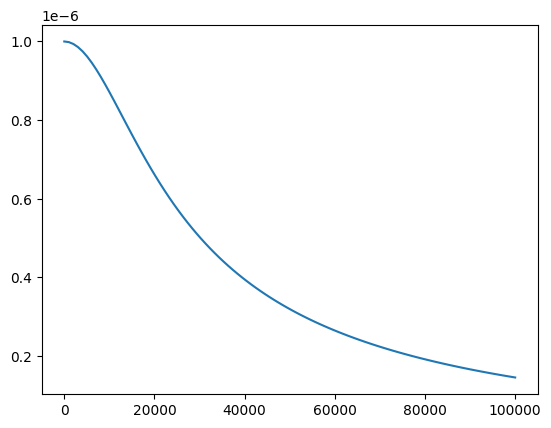

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x_value = np.linspace(1,100e3,100)
y_value = []
for i in x_value:
    y_value.append(TF_VC_func(1e-6,10e-6,10,2*3.14*i))
#print(y_value)
plt.plot(x_value,y_value)
plt.show()